<a href="https://colab.research.google.com/github/Saliyan-moksh081/Netflix_Case_Study/blob/master/Netflix_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the libraries which i need


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Netflix case study - loading the initial data



In [ ]:
df = pd.read_csv('/content/netflix.csv', encoding='latin-1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Performing the data cleaning - filling the Nan values with mode


In [ ]:
for column in df.columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Doing the rest of data cleaning

In [ ]:
df_new = df
df_new['date_added'] = pd.to_datetime(df_new['date_added'], errors='coerce') #converted date column to some format
df_new['duration'] = df_new['duration'].str.split(' ').str[0]
df_new['duration'] = pd.to_numeric(df_new['duration'], errors='coerce')



<ipython-input-5-ed50127f5fb5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['date_added'] = pd.to_datetime(df_new['date_added'], errors='coerce') #converted date column to some format


In [ ]:
df_new['cast'] = df_new['cast'].str.split(', ')
df_new = df_new.explode('cast')

df_new['director'] = df_new['director'].str.split(', ')
df_new = df_new.explode('director')

df_new['country'] = df_new['country'].str.split(', ')
df_new = df_new.explode('country')

df_new['listed_in'] = df_new['listed_in'].str.split(', ')
df_new = df_new.explode('listed_in')

df_new.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


Data Analyzation and Visualization Starts.......

Which countries produce the most content on Netflix?

Goal -  Identify top countries producing content, which could help Netflix focus on content acquisition or production in those regions.

<ipython-input-41-3904b9156b94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count', data=most_content, palette='viridis')


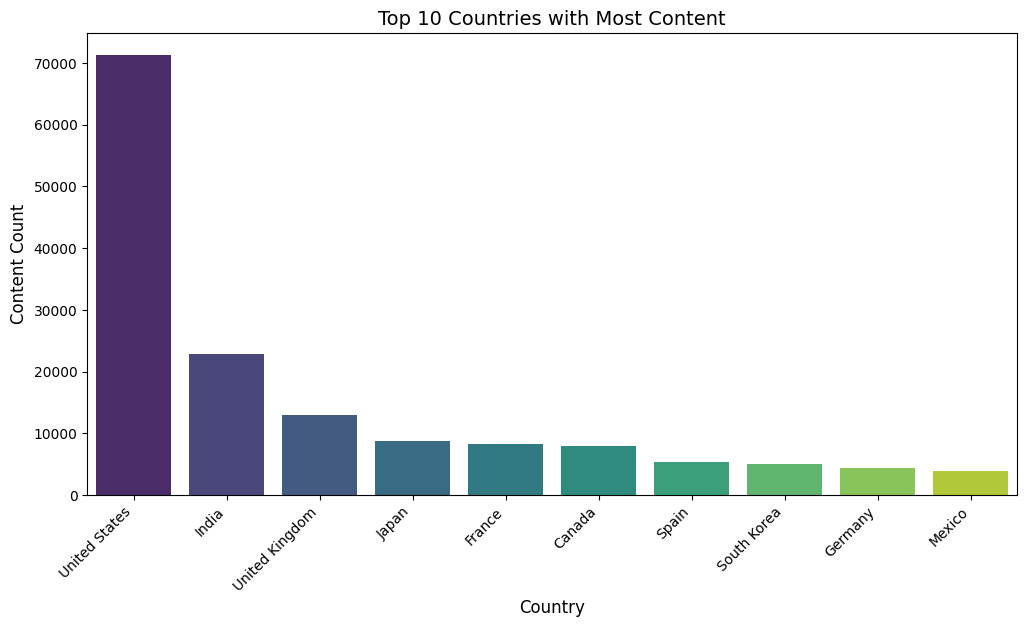

In [ ]:
most_content = df_new.groupby('country')['title'].count().reset_index(name='count')
most_content = most_content.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=most_content, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.title('Top 10 Countries with Most Content', fontsize=14)
plt.show()

2. Which type of content (movies vs TV shows) dominates in each country?

Insight - Understand regional content preferences for each coutry

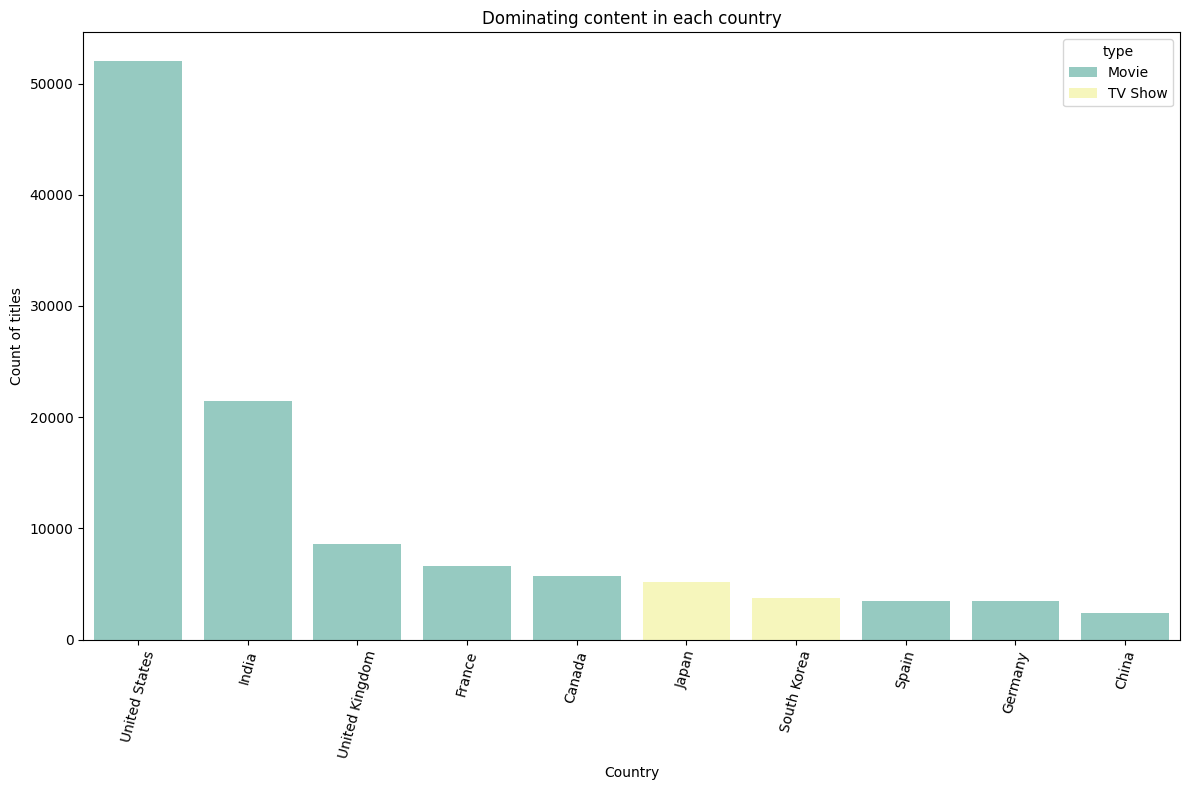

In [ ]:
dominating_content = df_new.groupby(['country', 'type']).size().reset_index(name='count')
dominating_content.head(10)
plt.figure(figsize=(12, 8))
top_content = dominating_content.loc[dominating_content.groupby('country')['count'].idxmax()]
N=10

top_countries = top_content.nlargest(N, 'count')
sns.barplot(x='country', y='count', hue='type', data=top_countries, palette='Set3')
plt.title('Dominating content in each country')
plt.xlabel('Country')
plt.ylabel('Count of titles')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


Has Netflix focused more on TV shows or movies in recent years?

Insight - Identify trends in Netflix’s content strategy.

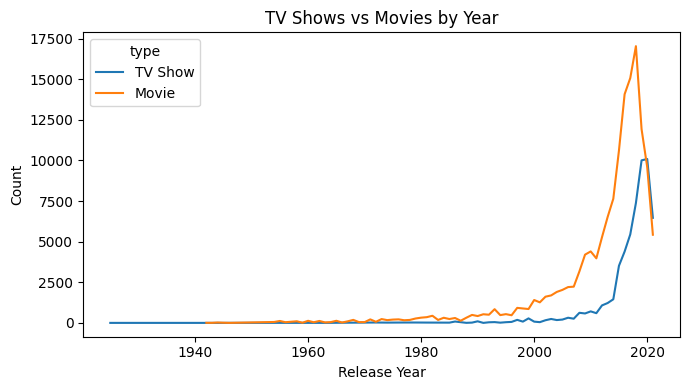

In [ ]:
content_by_year = df_new.groupby(['release_year', 'type']).size().reset_index(name='count')
content_by_year.head(10)
plt.figure(figsize=(7, 4))
sns.lineplot( x='release_year',
    y='count',
    hue='type',
    data=content_by_year)

plt.title('TV Shows vs Movies by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

3.What is the best time (month/season) to release new content on Netflix?
Analyze the Date_added column to find out which months Netflix adds the most new content.

Insight - Help Netflix decide the optimal times to release new content.

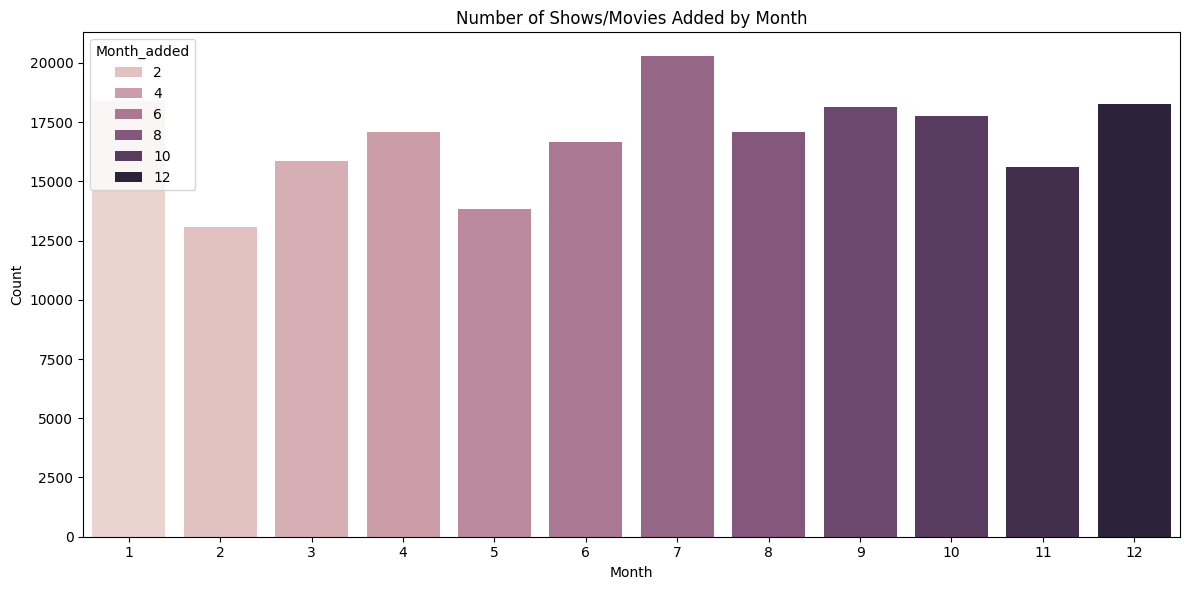

In [ ]:
df_new['date_added'].count()
df_new['Month_added'] = df_new['date_added'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='Month_added', data=df_new,hue='Month_added')
plt.title('Number of Shows/Movies Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4.What are the most popular genres on Netflix across different countries?

Goal - Understand which genres are well-received in different regions.

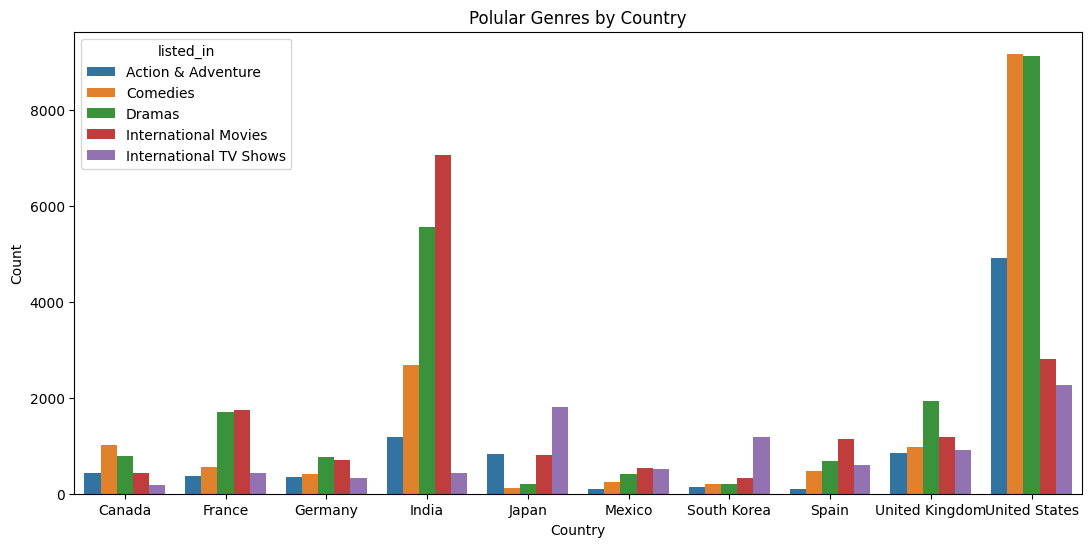

In [ ]:
popular_genres = df_new.groupby(['country', 'listed_in']).size().reset_index(name='count')
N=10
M=5

top_countries = popular_genres.groupby('country')['count'].sum().nlargest(N).index
top_genres = popular_genres.groupby('listed_in')['count'].sum().nlargest(M).index

filtered_data = popular_genres[
    (popular_genres['country'].isin(top_countries)) &
    (popular_genres['listed_in'].isin(top_genres))
]


plt.figure(figsize=(13,6))
sns.barplot(data=filtered_data, x='country', y='count', hue='listed_in')
plt.title('Polular Genres by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

5.Which actors and directors are associated with the highest-rated content?

Insight - Help Netflix focus on collaborating with popular and successful directors/actors.

            director                cast  Collaborations
38696  Rajiv Chilaka  David Attenborough             814
48226  Rajiv Chilaka    Takahiro Sakurai              54
49500  Rajiv Chilaka           Yuki Kaji              43
42136  Rajiv Chilaka        Jun Fukuyama              38
49484  Rajiv Chilaka     Yuichi Nakamura              38
42175  Rajiv Chilaka      Junichi Suwabe              37
42401  Rajiv Chilaka        Kate Harbour              37
35975  Rajiv Chilaka           Ai Kayano              37
38455  Rajiv Chilaka         Daisuke Ono              36
42208  Rajiv Chilaka     Justin Fletcher              35


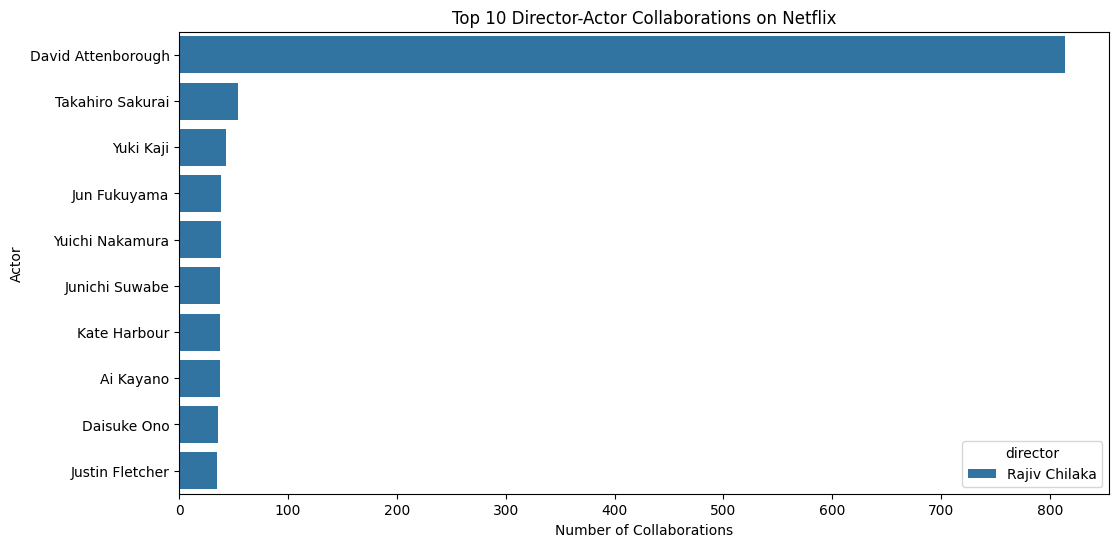

In [ ]:
collaborations = df_new.groupby(['director', 'cast']).size().reset_index(name='Collaborations')
collaborations_sorted = collaborations.sort_values(by='Collaborations', ascending=False).head(10)
print(collaborations_sorted)
plt.figure(figsize=(12, 6))
sns.barplot(x='Collaborations', y='cast', hue='director', data=collaborations_sorted)
plt.title('Top 10 Director-Actor Collaborations on Netflix')
plt.xlabel('Number of Collaborations')
plt.ylabel('Actor')
plt.show()


6.Is there a correlation between the duration of content and its rating?

Insight - Identify if content length impacts viewer reception.

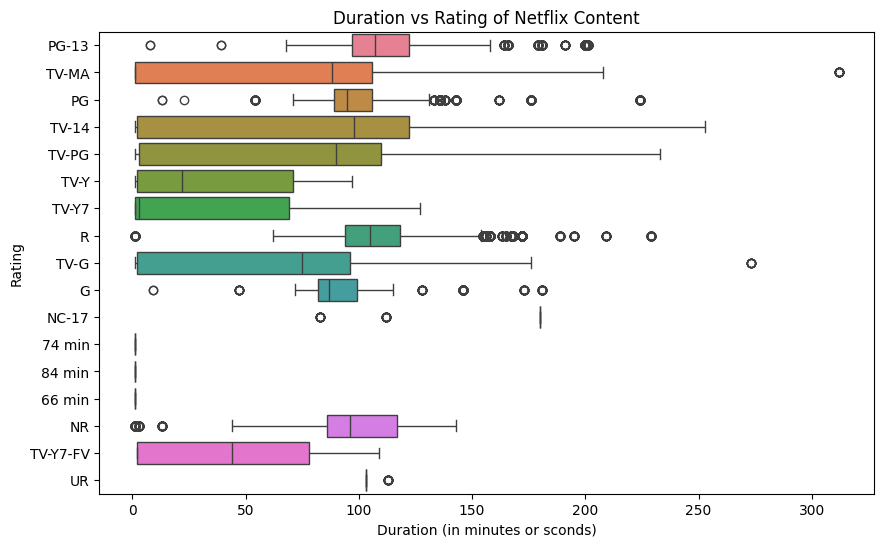

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', y='rating', data=df_new,hue='rating')
plt.title('Duration vs Rating of Netflix Content')
plt.xlabel('Duration (in minutes or sconds)')
plt.ylabel('Rating')
plt.show()


7.Do TV shows with more seasons tend to have higher ratings?
For TV shows, check the relationship between the number of seasons (from Duration) and Rating.
Goal: See if longevity correlates with audience approval

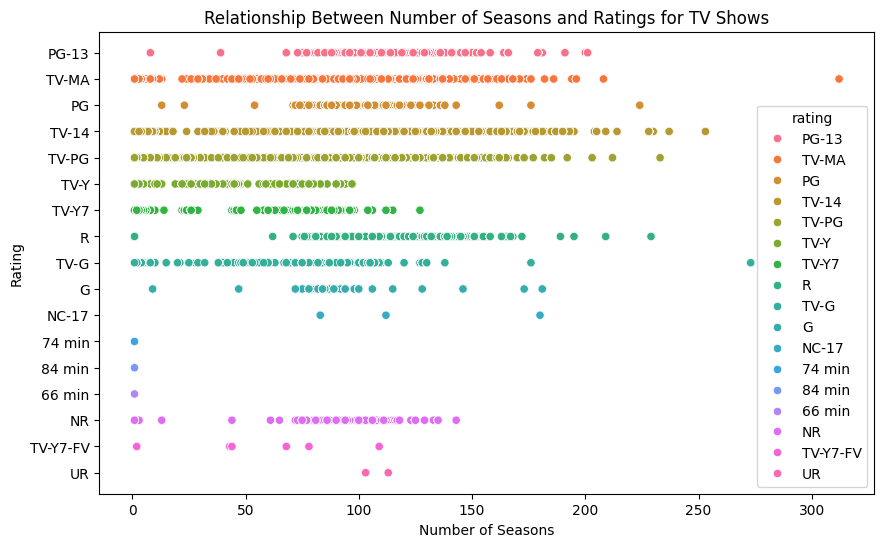

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating', data=df_new , hue='rating')
plt.title('Relationship Between Number of Seasons and Ratings for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Rating')
plt.show()



What is the distribution of content by release year?

insight - Visualizing thw content production trends.

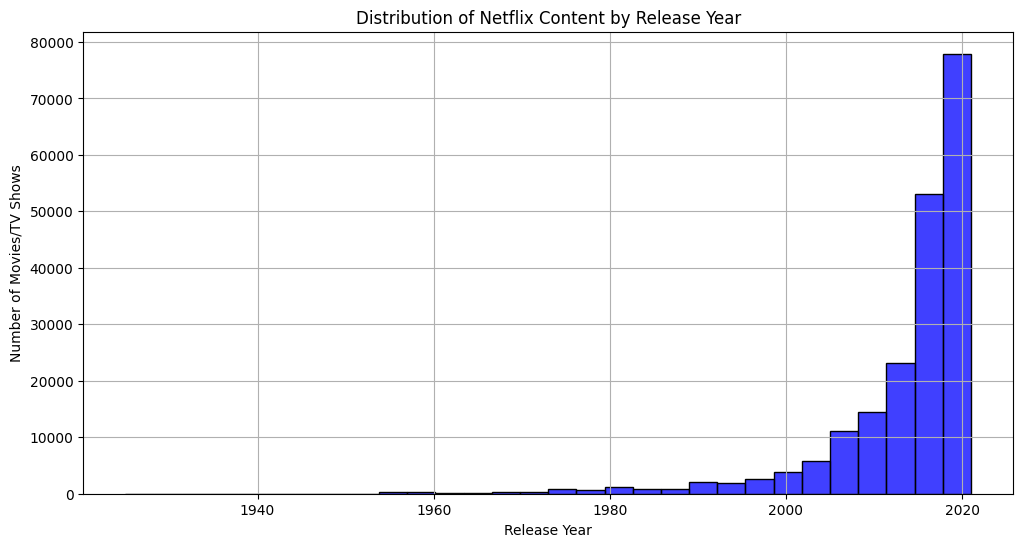

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_new['release_year'], bins=30, kde=False, color='blue')

plt.title('Distribution of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/TV Shows')
plt.grid(True)

plt.show()

What type of shows or movies should Netflix focus on producing in the future?

Goal: Guide Netflix’s content strategy for future production.

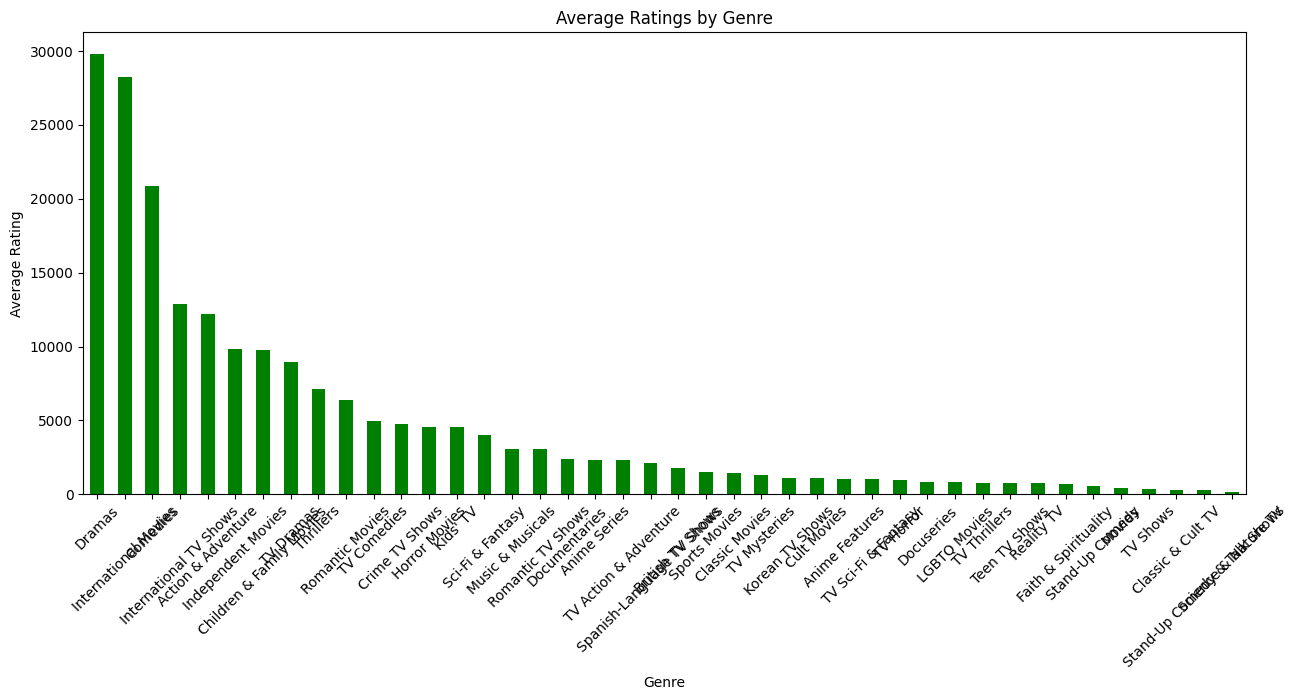

In [ ]:

genre_ratings = df_new.groupby('listed_in')['rating'].size()
genre_ratings = genre_ratings.sort_values(ascending=False)
plt.figure(figsize=(15, 6))
genre_ratings.plot(kind='bar', color='green')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Analyze director success

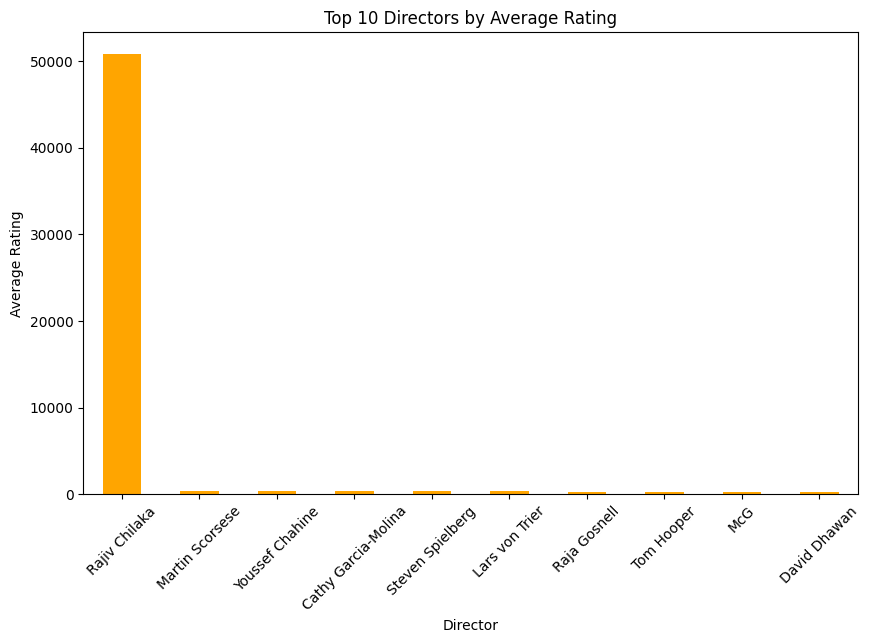

In [ ]:

director_ratings = df_new.groupby(['director']).size().sort_values(ascending=False)

top_directors = director_ratings.head(10)


# Plot top 10 directors by average rating
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Recommendations for Netflix

In [ ]:
print("Recommendations for Netflix’s Content Strategy:\n")

print("1. Focus on producing content in genres like Drama, Comedy, and Internatinal movies as they tend to have higher average ratings.\n")

print("2. Continue collaborations with successful directors such as Rajiv chilanka who have a history of high ratings.\n")


print("3. Consider casting actors like  David Attenborough, Takahiro Sakurai and Yuki Kaji in future projects as they consistently contribute to high-rated shows or movies.\n")

print("4. Prioritize content that aligns with the interests of audiences based on ratings to boost overall viewer satisfaction.")

Recommendations for Netflix’s Content Strategy:

1. Focus on producing content in genres like Drama, Comedy, and Internatinal movies as they tend to have higher average ratings.

2. Continue collaborations with successful directors such as Rajiv chilanka who have a history of high ratings.

3. Consider casting actors like  David Attenborough, Takahiro Sakurai and Yuki Kaji in future projects as they consistently contribute to high-rated shows or movies.

4. Prioritize content that aligns with the interests of audiences based on ratings to boost overall viewer satisfaction.
